<h2 style='color:green' align='center' ><font size="5.5">Classification of Monkeypox using VGG16</font></h2>


In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
tf.test.is_gpu_available(cuda_only=True)

True

<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [2]:
import os
import splitfolders

# input_dir = os.path.join(r'D:\datathon 2022 dataset\Data')
# output_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split')

# splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7,.3), group_prefix=None)

In [3]:
train_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split\train')
test_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (224, 224),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(224, 224),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [5]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 2086 images belonging to 5 classes.
Found 899 images belonging to 5 classes.


In [63]:
from collections import Counter

counter_train = Counter(train_generator.classes)

print(counter_train.items())

dict_items([(0, 272), (1, 416), (2, 420), (3, 489), (4, 489)])


In [64]:
counter_test = Counter(test_generator.classes)

print(counter_test.items()) 

dict_items([(0, 118), (1, 179), (2, 180), (3, 211), (4, 211)])


In [70]:
n = 3
counter_train[n]/counter_test[n]

2.3175355450236967

ERROR! Session/line number was not unique in database. History logging moved to new session 2206


In [6]:
classes = ['Acne','Cyst, tumour and skin-tags','Melanoma','Moneypox','Normal skin']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [7]:
import numpy as np

In [45]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

ERROR! Session/line number was not unique in database. History logging moved to new session 2202


In [46]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [47]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [48]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [49]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [13]:
X_train.shape

(2086, 224, 224, 3)

In [14]:
y_train.shape

(2086,)

In [15]:
y_train.shape

(2086,)

In [16]:
y_test.shape

(899,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [17]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

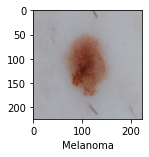

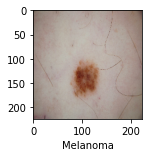

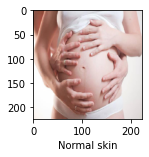

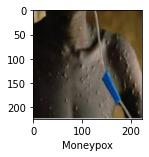

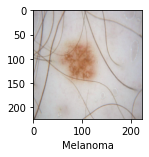

In [19]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [21]:
from keras.applications import VGG16
VGG = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable = False

In [22]:
def print_layer_trainable(model):
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [23]:
print_layer_trainable(VGG)

False:	input_1
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [24]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(units=1024,activation="relu"),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(units=1024,activation="relu"),
    keras.layers.Dense(units=5,activation="softmax")
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125445    
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
for layer in model.layers[:1]:
    layer.trainable = False

In [29]:
model.layers[-1].trainable

True

In [30]:
print_layer_trainable(model)

False:	vgg16
True:	flatten_1
True:	dense_1


In [31]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(8, activation='softmax')
# ])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125445    
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [33]:
# cnn.compile(optimizer='Adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [50]:
y_train_org = y_train.copy()
y_test_org = y_test.copy()

In [51]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [35]:
history=model.fit(X_train, y_train, epochs=16)

Epoch 1/16
2086/2086 [==============================] - 24s 12ms/step - loss: 6.4784 - accuracy: 0.5192
Epoch 2/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.9398 - accuracy: 0.8150
Epoch 3/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.8720 - accuracy: 0.8221
Epoch 4/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.3237 - accuracy: 0.9128
Epoch 5/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.3933 - accuracy: 0.9036
Epoch 6/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.5361 - accuracy: 0.8854
Epoch 7/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.3196 - accuracy: 0.9214
Epoch 8/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.4374 - accuracy: 0.9228
Epoch 9/16
2086/2086 [==============================] - 15s 7ms/step - loss: 0.2137 - accuracy: 0.9473
Epoch 10/16
2086/2086 [==============================] - 15s 7ms/step - 

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [36]:
accuracy=model.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

ERROR! Session/line number was not unique in database. History logging moved to new session 2198
899/899 [==============================] - 8s 9ms/step

Model Accuracy = 71.19021415710449 %


In [37]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [38]:
(history.history).keys()

dict_keys(['loss', 'accuracy'])

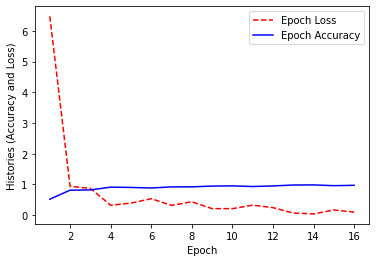

In [39]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [40]:
y_pred = model.predict(X_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 2199


In [41]:
y_classes = [np.argmax(element) for element in y_pred]

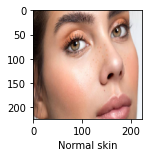

In [52]:
#Correct Anomalies 
plot_sample(X_test, y_test_org,4)

In [53]:
#Predict Anomalies by model
classes[y_classes[4]]

'Normal skin'

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [54]:
classes

['Acne', 'Cyst, tumour and skin-tags', 'Melanoma', 'Moneypox', 'Normal skin']

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_org,y_classes)

0.7119021134593994

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_org,y_classes)
cm

array([[ 82,  28,   0,   3,   5],
       [ 10, 128,   0,  18,  23],
       [  1,  62, 115,   1,   1],
       [  6,  43,   0, 134,  28],
       [  8,  15,   0,   7, 181]], dtype=int64)

ERROR! Session/line number was not unique in database. History logging moved to new session 2203


<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

ERROR! Session/line number was not unique in database. History logging moved to new session 2204


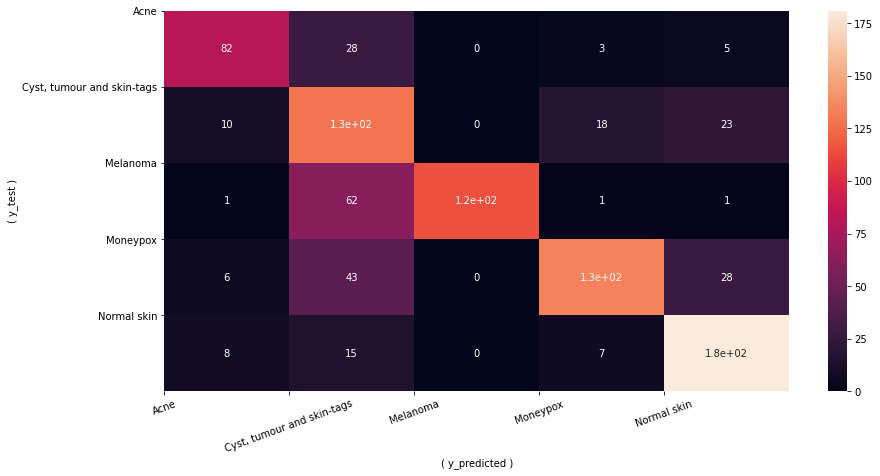

In [56]:
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)

plt.show()